In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# SI 618 Final Project: EU Transportation Data

## Data Sources

The first step is to load our data into separate dataframes. We are collecting and analyzing datasets that concern countries in the EU, and key data points that are associated with transportation, such as train ridership, car usage, economic productivity, and spending on transportation infrastructure. The datasets we are pulling, which are from Eurostat and the International Transport Forum, are as follows:
- **GDP per capita in PPS:** Contains EU countries, along with their GDP per capita from 2010 to 2021.
- **Population** on 1 January by sex, country of birth and group of citizenship from 2010 to 2021.
- **Number of passenger cars per 1,000 inhabitants** in each country from 2010 to 2021.
- **Number of passengers transported by railways** in each country from 2010 to 2021.
- **Inland transportation investment** including investment expenditure on railways infrastructure, roads, and waterways from 2000 to 2020. Both road spending and inland transportation investment come from the same data source.

In [207]:
# Load all datasets from csv files into dataframes
gdp = pd.read_csv("datasets/gdp.csv")
population = pd.read_csv("datasets/populations.csv")
passenger_cars = pd.read_csv("datasets/cars_per_1000_inhabitants.csv")
passenger_railways = pd.read_csv("datasets/passengers_transported.csv")
transportation_investment = pd.read_csv("datasets/transportation_spending.csv")

In [208]:
display(gdp.head(), population.head(), passenger_cars.head(), passenger_railways.head(), transportation_investment.head())

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEC00114(1.0),06/01/23 11:00:00,A,VI_PPS_EU27_2020_HAB,GDP,AL,2010,29,NaN
1,ESTAT:TEC00114(1.0),06/01/23 11:00:00,A,VI_PPS_EU27_2020_HAB,GDP,AL,2011,30,NaN
2,ESTAT:TEC00114(1.0),06/01/23 11:00:00,A,VI_PPS_EU27_2020_HAB,GDP,AL,2012,30,NaN
3,ESTAT:TEC00114(1.0),06/01/23 11:00:00,A,VI_PPS_EU27_2020_HAB,GDP,AL,2013,29,NaN
4,ESTAT:TEC00114(1.0),06/01/23 11:00:00,A,VI_PPS_EU27_2020_HAB,GDP,AL,2014,30,NaN


,DATAFLOW,LAST UPDATE,freq,indic_de,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TPS00001(1.0),01/12/22 23:00:00,A,JAN,AD,2011,78115,b
1,ESTAT:TPS00001(1.0),01/12/22 23:00:00,A,JAN,AD,2012,78115,NaN
2,ESTAT:TPS00001(1.0),01/12/22 23:00:00,A,JAN,AD,2013,76246,NaN
3,ESTAT:TPS00001(1.0),01/12/22 23:00:00,A,JAN,AD,2016,71732,NaN
4,ESTAT:TPS00001(1.0),01/12/22 23:00:00,A,JAN,AD,2018,74794,e


,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ROAD_EQS_CARHAB$DEFAULTVIEW(1.0),30/01/23 23:00:00,A,NR,AL,2013,118,NaN
1,ESTAT:ROAD_EQS_CARHAB$DEFAULTVIEW(1.0),30/01/23 23:00:00,A,NR,AL,2014,131,NaN
2,ESTAT:ROAD_EQS_CARHAB$DEFAULTVIEW(1.0),30/01/23 23:00:00,A,NR,AL,2015,140,NaN
3,ESTAT:ROAD_EQS_CARHAB$DEFAULTVIEW(1.0),30/01/23 23:00:00,A,NR,AL,2016,152,NaN
4,ESTAT:ROAD_EQS_CARHAB$DEFAULTVIEW(1.0),30/01/23 23:00:00,A,NR,AL,2017,147,NaN


,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:RAIL_PA_TOTAL(1.0),21/12/22 23:00:00,A,MIO_PKM,AT,2010,10263.0,NaN
1,ESTAT:RAIL_PA_TOTAL(1.0),21/12/22 23:00:00,A,MIO_PKM,AT,2011,10778.0,NaN
2,ESTAT:RAIL_PA_TOTAL(1.0),21/12/22 23:00:00,A,MIO_PKM,AT,2012,11211.0,NaN
3,ESTAT:RAIL_PA_TOTAL(1.0),21/12/22 23:00:00,A,MIO_PKM,AT,2013,11804.0,NaN
4,ESTAT:RAIL_PA_TOTAL(1.0),21/12/22 23:00:00,A,MIO_PKM,AT,2014,11981.0,NaN


,COUNTRY,Country,VARIABLE,Variable,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2000,2000,ALL,Lek,0,Units,NaN,NaN,1.464200e+10,NaN,NaN
1,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2001,2001,ALL,Lek,0,Units,NaN,NaN,1.400300e+10,NaN,NaN
2,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2002,2002,ALL,Lek,0,Units,NaN,NaN,9.275000e+09,NaN,NaN
3,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2003,2003,ALL,Lek,0,Units,NaN,NaN,8.460000e+09,NaN,NaN
4,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2004,2004,ALL,Lek,0,Units,NaN,NaN,1.189600e+10,NaN,NaN


## Data Wrangling

### Column Names

In [209]:
# Drop columns that are not needed from each dataframe
gdp.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'na_item', 'ppp_cat', 'OBS_FLAG'], inplace=True)
population.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'indic_de', 'OBS_FLAG'], inplace=True)
passenger_cars.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG'], inplace=True)
passenger_railways.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], inplace=True)
transportation_investment.drop(columns=['COUNTRY', 'VARIABLE',
                             'MEASURE', 'YEAR', 'Unit Code',
                            'Unit', 'PowerCode Code',
                            'PowerCode', 'Reference Period Code',
                            'Reference Period', 'Flag Codes',
                            'Flags'], inplace=True)

In [210]:
# Rename columns for consistency across all dataframes
gdp.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "gdp_per_capita"}, inplace=True)
population.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "population"}, inplace=True)
passenger_cars.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "passenger_cars_per_1000"}, inplace=True)
passenger_railways.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "passengers_transported"}, inplace=True)
transportation_investment.rename(columns={"Country": "country",
                                           "Year": "year",
                                            "Value": "value",
                                            "Variable": 'variable',
                                            'Measure': 'measure'},
                                            inplace=True)

In [211]:
# Only include the columns where Euro is the determined measure
# And where variable = "Total road spending" OR "Total inland transport infrastructure investment"
transportation_investment = transportation_investment[transportation_investment.measure == 'Euro']
transportation_investment = transportation_investment[transportation_investment.variable.isin(
    ['Total road spending', 'Total inland transport infrastructure investment'])]

### Filter Check

In [212]:
# Value counts to ensure we filtered properly
transportation_investment['measure'].value_counts()

Euro    1748
Name: measure, dtype: int64

In [213]:
# Value counts to ensure we filtered properly
transportation_investment['variable'].value_counts()

Total inland transport infrastructure investment    938
Total road spending                                 810
Name: variable, dtype: int64

### Keep Euros Only

In [214]:
# Drop Euro column because it's useless now that everything is in Euros
transportation_investment.drop(columns=['measure'], inplace=True)

### Dataframes Check

In [215]:
# Preview all dataframes to ensure appropriate names and values are included
passenger_cars.head()

,country,year,passenger_cars_per_1000
0,AL,2013,118
1,AL,2014,131
2,AL,2015,140
3,AL,2016,152
4,AL,2017,147


In [216]:
gdp.head()

,country,year,gdp_per_capita
0,AL,2010,29
1,AL,2011,30
2,AL,2012,30
3,AL,2013,29
4,AL,2014,30


In [217]:
population.head()

,country,year,population
0,AD,2011,78115
1,AD,2012,78115
2,AD,2013,76246
3,AD,2016,71732
4,AD,2018,74794


In [218]:
passenger_railways.head()

,unit,country,year,passengers_transported
0,MIO_PKM,AT,2010,10263.0
1,MIO_PKM,AT,2011,10778.0
2,MIO_PKM,AT,2012,11211.0
3,MIO_PKM,AT,2013,11804.0
4,MIO_PKM,AT,2014,11981.0


### passenger_railways cleaning

In [219]:
# see passenger railways shape before transformation
passenger_railways.shape

(799, 4)

In [220]:
# Filter passenger railways on 'unit' to only include values in 'THS_PAS' = thousand passengers and remove 'unit' column after filtering
passenger_railways = passenger_railways[passenger_railways['unit'] != 'MIO_PKM']
passenger_railways = passenger_railways.drop(columns=['unit'])
passenger_railways

,country,year,passengers_transported
414,AT,2010,239974.0
415,AT,2011,241526.0
416,AT,2012,260518.0
417,AT,2013,271888.0
418,AT,2014,270913.0
...,...,...,...
794,UK,2015,1741562.0
795,UK,2016,1772563.0
796,UK,2017,1757359.0
797,UK,2018,1783232.0


### Country Code Conversion

In [221]:
# Convert country codes into countries

#Dictionary with codes as keys and names as values
country_codes = {
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DE": "Germany",
    "DK": "Denmark",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "FX": "France (metropolitan)",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "LI": "Liechtenstein",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Turkey",
    "AD": "Andorra",
    "BY": "Belarus",
    "BA": "Bosnia",
    "XK": "Kosovo",
    "MD": "Moldova",
    "MC": "Monaco",
    "RU": "Russia",
    "SM": "San Marino",
    "UA": "Ukraine",
    "AM": "Armenia",
    "AZ": "Azerbaijan",
    "GE": "Georgia"
}

Next section: Update country codes to country names

In [222]:
# update country code to country names for each dataframe
for idx, value in passenger_cars['country'].items():
   if value in country_codes:
      passenger_cars.loc[idx, 'country'] = country_codes[value]

In [223]:
passenger_cars.head()

,country,year,passenger_cars_per_1000
0,Albania,2013,118
1,Albania,2014,131
2,Albania,2015,140
3,Albania,2016,152
4,Albania,2017,147


In [224]:
# update country code to country names
for idx, value in passenger_railways['country'].items():
   if value in country_codes:
      passenger_railways.loc[idx, 'country'] = country_codes[value]

In [225]:
passenger_railways.head()

,country,year,passengers_transported
414,Austria,2010,239974.0
415,Austria,2011,241526.0
416,Austria,2012,260518.0
417,Austria,2013,271888.0
418,Austria,2014,270913.0


In [226]:
# Update country code to country names
for idx, value in population['country'].items():
   if value in country_codes:
      population.loc[idx, 'country'] = country_codes[value]

In [227]:
population.head()

,country,year,population
0,Andorra,2011,78115
1,Andorra,2012,78115
2,Andorra,2013,76246
3,Andorra,2016,71732
4,Andorra,2018,74794


In [228]:
# Update country code to country names
for idx, value in gdp['country'].items():
   if value in country_codes:
      gdp.loc[idx, 'country'] = country_codes[value]

In [229]:
gdp.head()

,country,year,gdp_per_capita
0,Albania,2010,29
1,Albania,2011,30
2,Albania,2012,30
3,Albania,2013,29
4,Albania,2014,30


### transportation_investment Cleaning

In [230]:
# Here the transportation_investment df includes both inland transportation and road spending
transportation_investment.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In order to successfully join all tables, we first need to split the transportation investment table into two: one for road spending, and one for inland transport investment.

In [231]:
# Make a copy of transportation_investment for road spending
road_spending = transportation_investment.copy()
road_spending.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In [232]:
# Drop inland transport investment values
road_spending= road_spending[road_spending['variable'] != 'Total inland transport infrastructure investment']
road_spending

,country,variable,year,value
147,Albania,Total road spending,2000,1.121858e+08
148,Albania,Total road spending,2001,1.132736e+08
149,Albania,Total road spending,2002,7.128244e+07
150,Albania,Total road spending,2003,6.654982e+07
151,Albania,Total road spending,2004,9.790776e+07
...,...,...,...,...
10803,United States,Total road spending,2012,9.861154e+10
10804,United States,Total road spending,2013,9.549390e+10
10805,United States,Total road spending,2014,9.801550e+10
10806,United States,Total road spending,2015,1.199390e+11


In [233]:
# Drop the 'variable' column because it's no longer needed; rename 'value' column to 'total_road_spending'
road_spending = road_spending.drop(columns=['variable'])
road_spending.rename(columns={'value': 'total_road_spending'}, inplace=True)
road_spending

,country,year,total_road_spending
147,Albania,2000,1.121858e+08
148,Albania,2001,1.132736e+08
149,Albania,2002,7.128244e+07
150,Albania,2003,6.654982e+07
151,Albania,2004,9.790776e+07
...,...,...,...
10803,United States,2012,9.861154e+10
10804,United States,2013,9.549390e+10
10805,United States,2014,9.801550e+10
10806,United States,2015,1.199390e+11


In [234]:
# Make a copy of transportation_investment for inland transport investment
inland_transport_investment = transportation_investment.copy()
inland_transport_investment.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In [235]:
# Drop total road spending values
inland_transport_investment = inland_transport_investment[inland_transport_investment['variable'] != 'Total road spending']
inland_transport_investment

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07
...,...,...,...,...
10730,United States,Total inland transport infrastructure investment,2015,9.614906e+10
10731,United States,Total inland transport infrastructure investment,2016,9.625700e+10
10732,United States,Total inland transport infrastructure investment,2017,9.586912e+10
10733,United States,Total inland transport infrastructure investment,2018,9.548201e+10


In [236]:
# Drop 'variable' column because it's no longer needed; rename 'value' column to 'total_inland_transport_investment'
inland_transport_investment = inland_transport_investment.drop(columns=['variable'])
inland_transport_investment.rename(columns={'value': 'total_inland_transport_investment'}, inplace=True)
inland_transport_investment

,country,year,total_inland_transport_investment
84,Albania,2000,1.104212e+08
85,Albania,2001,1.090002e+08
86,Albania,2002,7.009591e+07
87,Albania,2003,6.152459e+07
88,Albania,2004,9.316940e+07
...,...,...,...
10730,United States,2015,9.614906e+10
10731,United States,2016,9.625700e+10
10732,United States,2017,9.586912e+10
10733,United States,2018,9.548201e+10


### Merge

Join all 6 tables.

In [237]:
merged_df1 = passenger_cars.merge(passenger_railways, on=['country', 'year'], how='left')
merged_df1

,country,year,passenger_cars_per_1000,passengers_transported
0,Albania,2013,118,NaN
1,Albania,2014,131,NaN
2,Albania,2015,140,NaN
3,Albania,2016,152,NaN
4,Albania,2017,147,NaN
...,...,...,...,...
355,United Kingdom,2017,471,1757359.0
356,United Kingdom,2018,473,1783232.0
357,Kosovo,2017,94,NaN
358,Kosovo,2018,143,NaN


In [238]:
merged_df2 = merged_df1.merge(gdp, on=['country', 'year'], how='left')
merged_df2

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita
0,Albania,2013,118,NaN,29.0
1,Albania,2014,131,NaN,30.0
2,Albania,2015,140,NaN,30.0
3,Albania,2016,152,NaN,30.0
4,Albania,2017,147,NaN,30.0
...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0
356,United Kingdom,2018,473,1783232.0,105.0
357,Kosovo,2017,94,NaN,NaN
358,Kosovo,2018,143,NaN,NaN


In [239]:
merged_df3 = merged_df2.merge(population, on=['country', 'year'], how='left')
merged_df3

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population
0,Albania,2013,118,NaN,29.0,2897770
1,Albania,2014,131,NaN,30.0,2892394
2,Albania,2015,140,NaN,30.0,2885796
3,Albania,2016,152,NaN,30.0,2875592
4,Albania,2017,147,NaN,30.0,2876591
...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142
356,United Kingdom,2018,473,1783232.0,105.0,66273576
357,Kosovo,2017,94,NaN,NaN,1783531
358,Kosovo,2018,143,NaN,NaN,1798506


In [240]:
merged_df4 = merged_df3.merge(road_spending, on=['country', 'year'], how='left')
merged_df4

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending
0,Albania,2013,118,NaN,29.0,2897770,2.429094e+08
1,Albania,2014,131,NaN,30.0,2892394,2.079811e+08
2,Albania,2015,140,NaN,30.0,2885796,1.876107e+08
3,Albania,2016,152,NaN,30.0,2875592,1.021451e+08
4,Albania,2017,147,NaN,30.0,2876591,1.726266e+08
...,...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142,1.110119e+10
356,United Kingdom,2018,473,1783232.0,105.0,66273576,1.100430e+10
357,Kosovo,2017,94,NaN,NaN,1783531,NaN
358,Kosovo,2018,143,NaN,NaN,1798506,NaN


In [241]:
merged_df5 = merged_df4.merge(inland_transport_investment, on=['country', 'year'], how='left')
merged_df5

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
0,Albania,2013,118,NaN,29.0,2897770,2.429094e+08,2.348552e+08
1,Albania,2014,131,NaN,30.0,2892394,2.079811e+08,1.934331e+08
2,Albania,2015,140,NaN,30.0,2885796,1.876107e+08,1.798056e+08
3,Albania,2016,152,NaN,30.0,2875592,1.021451e+08,8.914034e+07
4,Albania,2017,147,NaN,30.0,2876591,1.726266e+08,1.590396e+08
...,...,...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142,1.110119e+10,2.224614e+10
356,United Kingdom,2018,473,1783232.0,105.0,66273576,1.100430e+10,2.221615e+10
357,Kosovo,2017,94,NaN,NaN,1783531,NaN,NaN
358,Kosovo,2018,143,NaN,NaN,1798506,NaN,NaN


In [242]:
# review unique country values to check all codes were transformed to a name
merged_df5['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Switzerland',
       'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'EU27_2020', 'Finland', 'France', 'Croatia', 'Hungary',
       'Ireland', 'Iceland', 'Italy', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Montenegro', 'North Macedonia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Sweden', 'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom',
       'Kosovo'], dtype=object)

In [243]:
# remove extraneous country names that did not have a match: 'EU27_2020'; print unique country values to ensure value was removed
merged_df5 = merged_df5[merged_df5['country'] != 'EU27_2020']
merged_df5['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Switzerland',
       'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Italy', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Latvia', 'Montenegro', 'North Macedonia', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom', 'Kosovo'],
      dtype=object)

### Drop null Values

In [244]:
# Check number of null values
merged_df5.isna().sum()

country                                0
year                                   0
passenger_cars_per_1000                0
passengers_transported                70
gdp_per_capita                        13
population                             0
total_road_spending                  160
total_inland_transport_investment    130
dtype: int64

In [245]:
# Drop null values
country_data = merged_df5.dropna()

In [246]:
country_data.shape

(150, 8)

In [247]:
country_data.head(20)

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09
14,Austria,2017,555,288503.0,127.0,8772865,1.202000e+09,2.070000e+09
15,Austria,2018,562,307647.0,127.0,8822267,1.189000e+09,2.148000e+09
16,Austria,2019,566,314892.0,126.0,8858775,1.314000e+09,2.303500e+09
17,Austria,2020,570,191272.0,125.0,8901064,1.339000e+09,2.553700e+09
29,Bulgaria,2012,385,26508.0,47.0,7327224,6.974128e+08,6.999693e+08


### Feature Engineering

##### View Initial Data

In [248]:
display(country_data.head())
display(country_data.shape)
display(country_data.info())
display(country_data.isnull().sum())
display(country_data.columns)
display(country_data['country'].unique())
display(country_data['year'].unique())

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09


(150, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 9 to 356
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            150 non-null    object 
 1   year                               150 non-null    int64  
 2   passenger_cars_per_1000            150 non-null    int64  
 3   passengers_transported             150 non-null    float64
 4   gdp_per_capita                     150 non-null    float64
 5   population                         150 non-null    int64  
 6   total_road_spending                150 non-null    float64
 7   total_inland_transport_investment  150 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 10.5+ KB


None

country                              0
year                                 0
passenger_cars_per_1000              0
passengers_transported               0
gdp_per_capita                       0
population                           0
total_road_spending                  0
total_inland_transport_investment    0
dtype: int64

Index(['country', 'year', 'passenger_cars_per_1000', 'passengers_transported',
       'gdp_per_capita', 'population', 'total_road_spending',
       'total_inland_transport_investment'],
      dtype='object')

array(['Austria', 'Bulgaria', 'Switzerland', 'Denmark', 'Estonia',
       'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Norway', 'Poland',
       'Portugal', 'Sweden', 'Slovenia', 'United Kingdom'], dtype=object)

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

##### Region

In [249]:
# Break up country based on region, based on EuroVoc
regions = {
    'Austria': 'western_europe',
    'Switzerland': 'western_europe',
    'France': 'western_europe',
    'Ireland': 'western_europe',
    'Luxembourg': 'western_europe',
    'United Kingdom': 'western_europe',
    'Bulgaria': 'central_eastern_europe',
    'Croatia': 'central_eastern_europe',
    'Hungary': 'central_eastern_europe',
    'Poland': 'central_eastern_europe',
    'Slovenia': 'central_eastern_europe',
    'Denmark': 'northern_europe',
    'Estonia': 'northern_europe',
    'Finland': 'northern_europe',
    'Lithuania': 'northern_europe',
    'Latvia': 'northern_europe',
    'Norway': 'northern_europe',
    'Sweden': 'northern_europe',
    'Italy': 'southern_europe',
    'Portugal': 'southern_europe',
}

region_data = country_data.copy()
region_data['region'] = region_data['country'].map(regions)

region_data.head()

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,region
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,western_europe
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,western_europe
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,western_europe
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,western_europe
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,western_europe


##### Population Size

In [250]:
display(country_data.population.describe())
# Based on summary statistics of population, gave ChatGPT and asked for mapping
pop_size_mapping = {
    'Small': lambda x: x < 5_000_000,
    'Medium': lambda x: 5_000_000 <= x < 20_000_000,
    'Large': lambda x: x >= 20_000_000
}
# Map the population sizes to the 'pop_size' column
pop_data = region_data.copy()
pop_data['pop_size'] = pop_data['population'].apply(lambda x: next(key for key, value in pop_size_mapping.items() if value(x)))

display(pop_data.pop_size.value_counts())
display(pop_data.groupby('region').pop_size.value_counts())
display(pop_data.head())

count    1.500000e+02
mean     1.498089e+07
std      2.157131e+07
min      5.248530e+05
25%      2.797863e+06
50%      5.552904e+06
75%      9.825102e+06
max      6.748553e+07
Name: population, dtype: float64

Small     63
Medium    59
Large     28
Name: pop_size, dtype: int64

region                  pop_size
central_eastern_europe  Small       18
                        Medium      12
                        Large        6
northern_europe         Medium      28
                        Small       28
southern_europe         Large        8
                        Medium       2
western_europe          Medium      17
                        Small       17
                        Large       14
Name: pop_size, dtype: int64

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,region,pop_size
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,western_europe,Medium
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,western_europe,Medium
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,western_europe,Medium
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,western_europe,Medium
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,western_europe,Medium


#### Spending and Passengers Transported per 1000

In [251]:
transportation_data = pop_data.copy()

# from ChatGPT

# Calculate passengers transported per 1000 population by country and year
transportation_data['passengers_transported_per_1000'] = \
    (transportation_data['passengers_transported'] / transportation_data['population']) * 1000

# Calculate inland investment per 1000 population by country and year
transportation_data['inland_investment_per_1000'] = \
    (transportation_data['total_inland_transport_investment'] / transportation_data['population']) * 1000

# Calculate road spending per 1000 population by country and year
transportation_data['road_spending_per_1000'] = \
    (transportation_data['total_road_spending'] / transportation_data['population']) * 1000

# calculate non-road spending
transportation_data['non_road_spending'] = transportation_data['total_inland_transport_investment'] - transportation_data['total_road_spending']


# calculate non-road spending per 1000
transportation_data['non_road_spending_per_1000'] = \
    (transportation_data['non_road_spending'] / transportation_data['population']) * 1000

#### View Updated Data

In [252]:
display(transportation_data.head())
display(transportation_data.shape)
display(transportation_data.info())
display(transportation_data.isnull().sum())
display(transportation_data.columns)

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,region,pop_size,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending,non_road_spending_per_1000
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,western_europe,Medium,30.984093,240006.060807,100379.145352,1.174000e+09,139626.915455
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,western_europe,Medium,32.169014,239237.280315,109088.413675,1.100000e+09,130148.866640
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,western_europe,Medium,31.842950,238604.967262,131644.119869,9.100000e+08,106960.847393
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,western_europe,Medium,32.622296,233665.380459,133606.276862,8.590000e+08,100059.103596
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,western_europe,Medium,32.985571,226309.587148,131142.325513,8.280000e+08,95167.261634


(150, 15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 9 to 356
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            150 non-null    object 
 1   year                               150 non-null    int64  
 2   passenger_cars_per_1000            150 non-null    int64  
 3   passengers_transported             150 non-null    float64
 4   gdp_per_capita                     150 non-null    float64
 5   population                         150 non-null    int64  
 6   total_road_spending                150 non-null    float64
 7   total_inland_transport_investment  150 non-null    float64
 8   region                             150 non-null    object 
 9   pop_size                           150 non-null    object 
 10  passengers_transported_per_1000    150 non-null    float64
 11  inland_investment_per_1000         150 non-null    float64

None

country                              0
year                                 0
passenger_cars_per_1000              0
passengers_transported               0
gdp_per_capita                       0
population                           0
total_road_spending                  0
total_inland_transport_investment    0
region                               0
pop_size                             0
passengers_transported_per_1000      0
inland_investment_per_1000           0
road_spending_per_1000               0
non_road_spending                    0
non_road_spending_per_1000           0
dtype: int64

Index(['country', 'year', 'passenger_cars_per_1000', 'passengers_transported',
       'gdp_per_capita', 'population', 'total_road_spending',
       'total_inland_transport_investment', 'region', 'pop_size',
       'passengers_transported_per_1000', 'inland_investment_per_1000',
       'road_spending_per_1000', 'non_road_spending',
       'non_road_spending_per_1000'],
      dtype='object')

## EDA

### Numerical Analysis

#### Summary Table

In [253]:
display(transportation_data.describe())

,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending,non_road_spending_per_1000
count,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,2015.626667,501.873333,2.740963e+05,112.260000,1.498089e+07,3.138351e+09,3.814688e+09,17.826423,2.999852e+05,2.610757e+05,6.763373e+08,38909.462459
std,2.515847,94.155968,4.234211e+05,53.613385,2.157131e+07,4.195269e+09,5.876872e+09,16.730224,2.513449e+05,2.158719e+05,2.746606e+09,107635.580031
min,2012.000000,301.000000,3.238000e+03,46.000000,5.248530e+05,1.922000e+08,1.631000e+08,1.158875,2.688969e+04,3.671111e+04,-5.696000e+09,-214773.225736
25%,2013.000000,431.000000,1.969500e+04,74.000000,2.797863e+06,4.035000e+08,4.106782e+08,6.348290,1.294072e+05,1.382277e+05,-7.404447e+07,-16077.485355
50%,2015.500000,513.000000,6.879000e+04,104.000000,5.552904e+06,1.037605e+09,1.648500e+09,12.804816,2.075604e+05,1.811853e+05,1.700000e+07,5017.048100
75%,2018.000000,563.750000,2.716442e+05,129.000000,9.825102e+06,3.523378e+09,3.915846e+09,24.029419,3.632212e+05,3.231017e+05,4.378088e+08,94480.617385
max,2020.000000,682.000000,1.783232e+06,283.000000,6.748553e+07,1.602470e+10,2.373355e+10,74.386212,1.022040e+06,1.134319e+06,1.150134e+10,471456.715586


#### By Country

In [254]:
# group_by_country = ['country', 'passenger_cars_per_1000', 'passengers_transported',
#        'gdp_per_capita', 'population', 'total_road_spending',
#        'total_inland_transport_investment']
# country_data[group_by_country].groupby(['country'], as_index=False).mean()

#### By Year

In [255]:
# group_by_year = ['year', 'passenger_cars_per_1000', 'passengers_transported',
#        'gdp_per_capita', 'population', 'total_road_spending',
#        'total_inland_transport_investment']
# country_data[group_by_year].groupby(['year'], as_index=False).mean()

### Visual Analysis

#### Boxplots

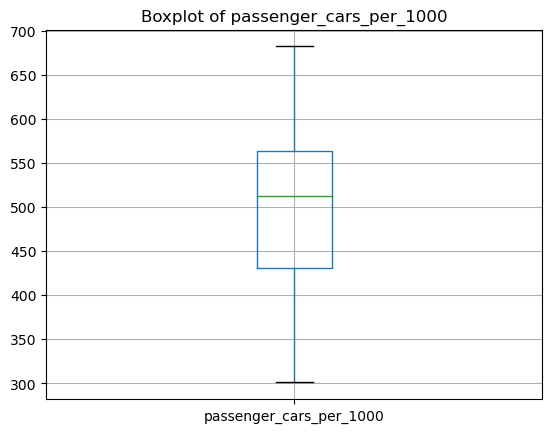

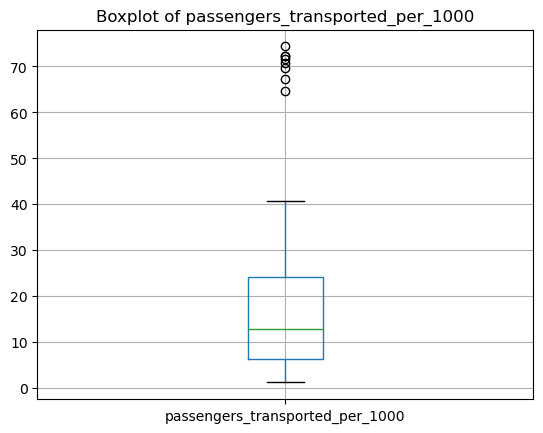

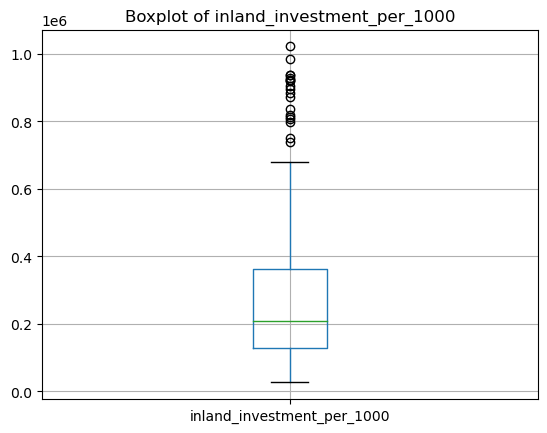

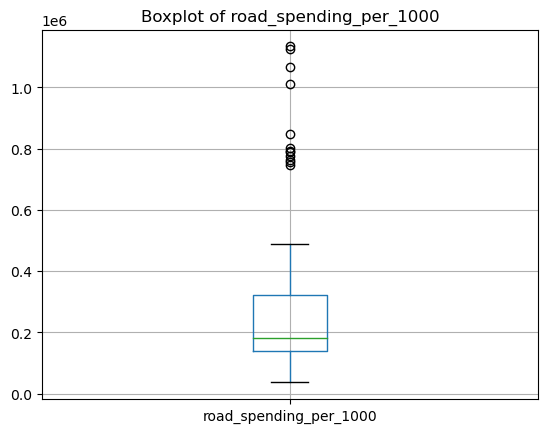

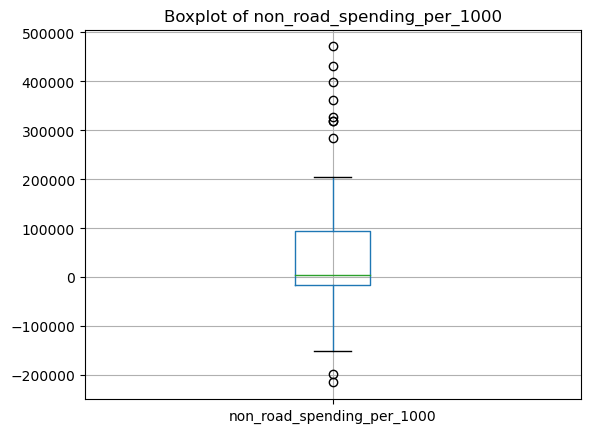

In [256]:
columns_to_plot = [
        'passenger_cars_per_1000',
        'passengers_transported_per_1000',
        'inland_investment_per_1000',
        'road_spending_per_1000',
        'non_road_spending_per_1000']
for column in columns_to_plot:
    fig, ax = plt.subplots()
    transportation_data[[column]].boxplot(ax=ax)
    ax.set_title('Boxplot of {}'.format(column))
    plt.show()

### EDA Write Up

- Shape:
    - 150 rows and 8 columns.
- Columns:
    - 'country':
        - 20 EU countries.
        - object
        - found in all 5 data sources.
    - 'year':
        - one of the 9 years that the data is for (2012 - 2020).
        - int64
        - found in all 5 data sources.
    - 'passenger_cars_per_1000':
        - number of passenger cars per 1000 population per year.
        - int64
        - found in 1 data source (cars_per_1000_inhabitants.csv)
    - 'passengers_transported':
        - number of railway passengers transported per year.
        - float64
        - found in 1 data source (passengers_transported.csv)
    - 'gdp_per_capita':
        - gdp per capita for that year.
        - float64
        - found in 1 data source (gdp.csv)
    - 'population':
        - population of a country per year.
        - int64
        - found in 1 data source (populations.csv)
    - 'total_road_spending':
        - __? FILL THIS IN__
        - float64
        - found in 1 data source (transportation_spending.csv)
    - 'total_inland_transport_investment':
        - __? FILL THIS IN__
        - float64
        - found in 1 data source (transportation_spending.csv)
- EU Countries:
    - 'Austria'
    - 'Bulgaria'
    - 'Switzerland'
    - 'Denmark'
    - 'Estonia',
    - 'Finland'
    - 'France'
    - 'Croatia'
    - 'Hungary'
    - 'Ireland'
    - 'Italy'
    - 'Lithuania'
    - 'Luxembourg'
    - 'Latvia'
    - 'Norway'
    - 'Poland'
    - 'Portugal'
    - 'Sweden'
    - 'Slovenia'
    - 'United Kingdom'

## Regression Analysis


<Axes: >

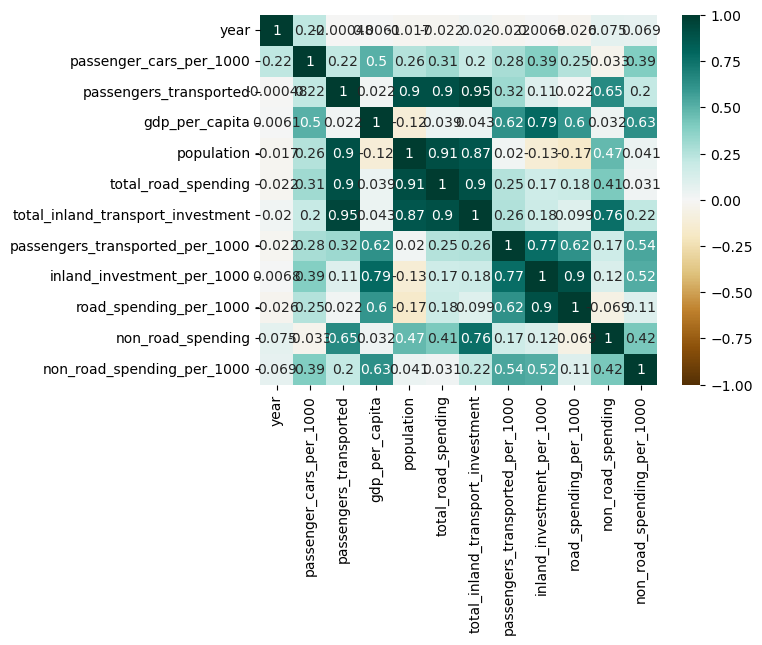

In [257]:
sns.heatmap(transportation_data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')

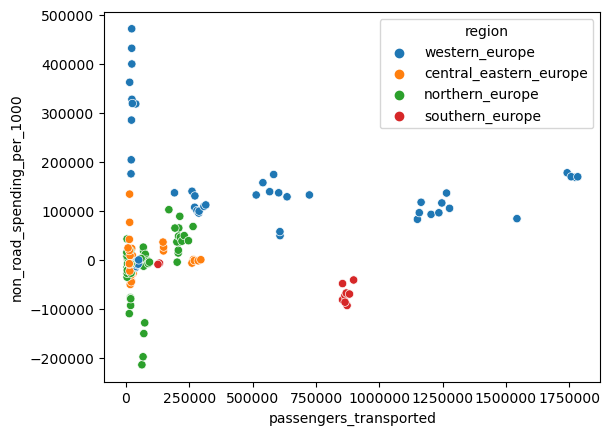

In [258]:
# Scatterplot of road spending, non road spending, etc. with region as hue
sns.scatterplot(data=transportation_data, x='passengers_transported', y='non_road_spending_per_1000', hue='region')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

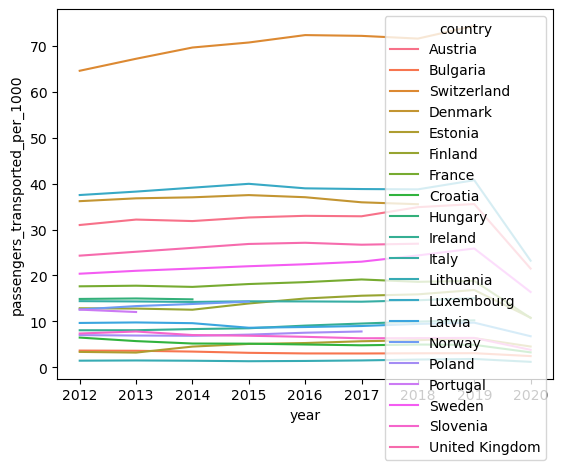

In [259]:
# Time series of spending, group by region
sns.lineplot(data=transportation_data, x = "year", y = "passengers_transported_per_1000", hue="country")
plt.ticklabel_format(style='plain', axis='y')

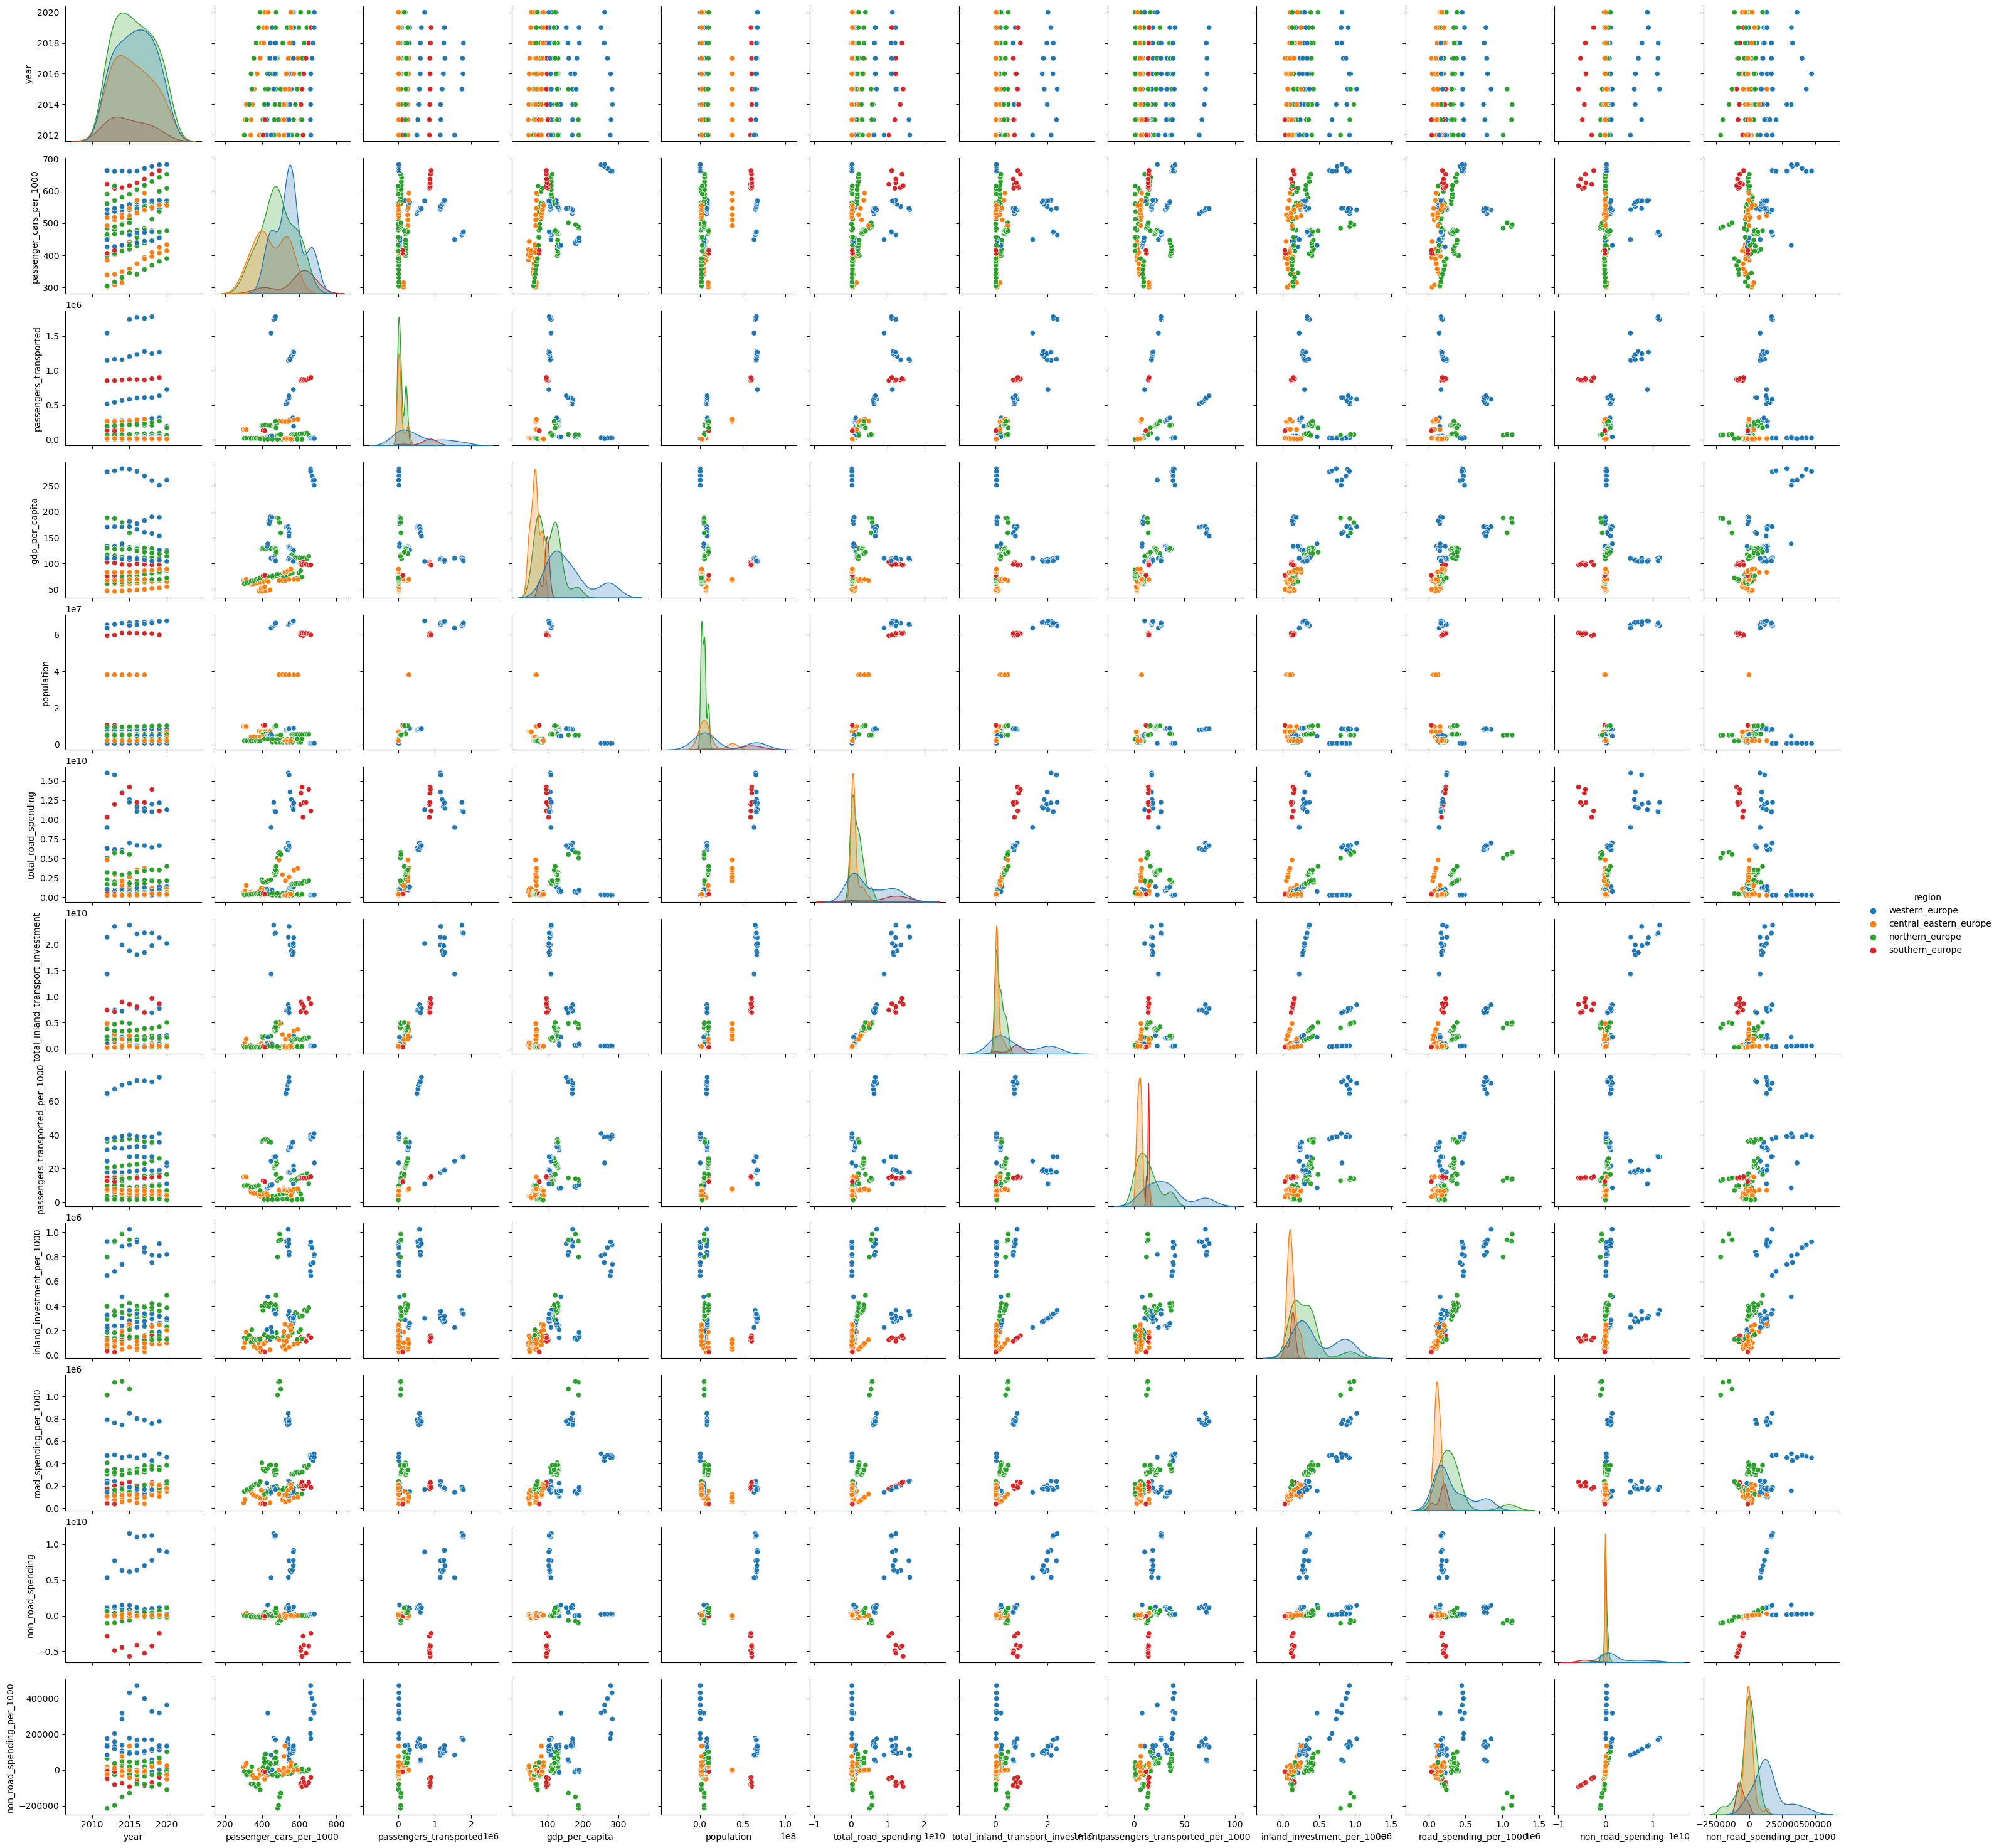

In [260]:
sns.pairplot(data=transportation_data, hue='region')

In [261]:
# OLS Regression on passengers_transported as a function of non_road_spending
# F-statistic is really big, which means there is a difference
model1 = smf.ols('passengers_transported_per_1000 ~ non_road_spending_per_1000*passenger_cars_per_1000', data=transportation_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     passengers_transported_per_1000   R-squared:                       0.311
Model:                                         OLS   Adj. R-squared:                  0.297
Method:                              Least Squares   F-statistic:                     21.95
Date:                             Thu, 06 Apr 2023   Prob (F-statistic):           8.66e-12
Time:                                     17:55:02   Log-Likelihood:                -607.00
No. Observations:                              150   AIC:                             1222.
Df Residuals:                                  146   BIC:                             1234.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              5.8101      6.678      0.870      0.386      -7.388      19.008
non_road_spending_per_1000                             0.0002   6.53e-05      2.650      0.009     4.4e-05       0.000
passenger_cars_per_1000                                0.0180      0.013      1.339      0.182      -0.009       0.045
non_road_spending_per_1000:passenger_cars_per_1000 -1.602e-07    1.1e-07     -1.459      0.147   -3.77e-07    5.69e-08
==============================================================================
Omnibus:                       61.156   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.031
Skew:                           1.673   Prob(JB):                     8.85e-37
Kurtosis:                       6.921   Cond. No.                     3.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
# OLS Regression on passengers_transported as a function of non_road_spending
# F-statistic is really big, which means there is a difference
model2 = smf.ols('passengers_transported_per_1000 ~ non_road_spending_per_1000', data=transportation_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     passengers_transported_per_1000   R-squared:                       0.295
Model:                                         OLS   Adj. R-squared:                  0.290
Method:                              Least Squares   F-statistic:                     61.90
Date:                             Thu, 06 Apr 2023   Prob (F-statistic):           7.00e-13
Time:                                     17:55:02   Log-Likelihood:                -608.72
No. Observations:                              150   AIC:                             1221.
Df Residuals:                                  148   BIC:                             1227.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     14.5422      1.224     11.878      0.000      12.123      16.962
non_road_spending_per_1000  8.441e-05   1.07e-05      7.868      0.000    6.32e-05       0.000
==============================================================================
Omnibus:                       65.564   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.252
Skew:                           1.793   Prob(JB):                     9.78e-41
Kurtosis:                       7.076   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
transportation_data.head()

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment,region,pop_size,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending,non_road_spending_per_1000
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09,western_europe,Medium,30.984093,240006.060807,100379.145352,1.174000e+09,139626.915455
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09,western_europe,Medium,32.169014,239237.280315,109088.413675,1.100000e+09,130148.866640
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09,western_europe,Medium,31.842950,238604.967262,131644.119869,9.100000e+08,106960.847393
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09,western_europe,Medium,32.622296,233665.380459,133606.276862,8.590000e+08,100059.103596
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09,western_europe,Medium,32.985571,226309.587148,131142.325513,8.280000e+08,95167.261634


In [180]:
transportation_data.region.value_counts()

northern_europe           56
western_europe            48
central_eastern_europe    36
southern_europe           10
Name: region, dtype: int64

In [263]:
# We did a 0.1 - we don't have enough data, it overfits with 0.1
# We used stratified shuffle split
split = StratifiedShuffleSplit(n_splits=1, random_state=42)

# Two tuple of index values returned
for train_index, test_index in split.split(transportation_data, transportation_data['region']):
    strat_train_set = transportation_data.iloc[train_index]
    strat_test_set = transportation_data.iloc[test_index]

# AKA features matrix
country_X = strat_train_set.drop('passengers_transported_per_1000', axis=1)
country_y = strat_train_set['passengers_transported_per_1000']

cat_attribs = country_X.select_dtypes(exclude=np.number).columns
num_attribs = country_X.select_dtypes(include=np.number).columns

# Create pipeline to encode categorical attributes
full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ("num", StandardScaler(), num_attribs)
])

country_prepared = full_pipeline.fit_transform(country_X)

# Fit linear regression model
lm = LinearRegression()
lm = lm.fit(country_prepared, country_y)

# Test model
first_five = country_X.iloc[:5]
first_five_prepared = full_pipeline.transform(first_five)
lm.predict(first_five_prepared)

array([ 7.35852051, 20.27783203,  3.32653809, 69.84228516,  5.15631104])

In [264]:
# Get accuracy score
result = cross_validate(lm, country_prepared, country_y, scoring="neg_root_mean_squared_error")

# put minus sign in front of mean
-np.mean(result['test_score']), np.std(result['test_score'])

(361058233044.36536, 722116466084.6904)

In [265]:
# Use it to predict against scenarios
country_X = strat_test_set.drop('passengers_transported_per_1000', axis='columns')
country_y = strat_test_set[['passengers_transported_per_1000']]

country_test_prepared = full_pipeline.transform(country_X)
result = cross_validate(lm, country_test_prepared, country_y, scoring="neg_root_mean_squared_error")
result

{'fit_time': array([0.00167227, 0.0015049 , 0.00159883, 0.0013628 , 0.00124574]),
 'score_time': array([0.00065112, 0.0007031 , 0.00069928, 0.00084424, 0.00059438]),
 'test_score': array([-65.42779905, -16.47225204, -14.98927543, -16.0234878 ,
         -4.91392506])}

In [266]:
# Our values are large compared to train, which is not ideal and means we are overfitting
-np.mean(result['test_score']), np.std(result['test_score'])

(23.565347876010787, 21.359218487299614)

In [267]:
# Run again with test_size = 0.33
# We used stratified shuffle split
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size = 0.33)

# Two tuple of index values returned
for train_index, test_index in split.split(transportation_data, transportation_data['region']):
    strat_train_set = transportation_data.iloc[train_index]
    strat_test_set = transportation_data.iloc[test_index]

# AKA features matrix
country_X = strat_train_set.drop('passengers_transported_per_1000', axis=1)
country_y = strat_train_set['passengers_transported_per_1000']

cat_attribs = country_X.select_dtypes(exclude=np.number).columns
num_attribs = country_X.select_dtypes(include=np.number).columns

# If we don't have handle_unknown it results in an error - a ountry has no data
full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ("num", StandardScaler(), num_attribs)
])

country_prepared = full_pipeline.fit_transform(country_X)

lm = LinearRegression()
lm = lm.fit(country_prepared, country_y)

# Test model
first_five = country_X.iloc[:5]
first_five_prepared = full_pipeline.transform(first_five)
lm.predict(first_five_prepared)

array([37.41186523,  7.27075195, 69.25463867, 14.92089844,  3.25073242])

In [268]:
# Get accuracy score
result = cross_validate(lm, country_prepared, country_y, scoring="neg_root_mean_squared_error")

# put minus sign in front of mean
-np.mean(result['test_score']), np.std(result['test_score'])

(430294682324.1796, 860589364642.1677)

In [269]:
# Use it to predict against scenarios
country_X = strat_test_set.drop('passengers_transported_per_1000', axis='columns')
country_y = strat_test_set[['passengers_transported_per_1000']]

country_test_prepared = full_pipeline.transform(country_X)
result = cross_validate(lm, country_test_prepared, country_y, scoring="neg_root_mean_squared_error")
result

{'fit_time': array([0.00171375, 0.00120711, 0.0010612 , 0.00101304, 0.00103307]),
 'score_time': array([0.00063491, 0.00055099, 0.00051999, 0.00052309, 0.00051999]),
 'test_score': array([-2.79678769e+12, -2.13068284e+12, -6.47071591e+12, -2.99545546e+12,
        -2.82699648e+12])}

In [270]:
# Values became even larger which means we have to do something simpler
# lm model will overfit due to lack of data
-np.mean(result['test_score']), np.std(result['test_score'])

(3444127675195.9155, 1541854754661.2021)

## Clustering Analysis

__Tyler change to pdf titles genius!__

### Setup

In [271]:
clustering_columns = ['pop_size', 'region', 'country',
                    'passenger_cars_per_1000',
                    'passengers_transported_per_1000',
                    'inland_investment_per_1000',
                    'road_spending_per_1000',
                    'non_road_spending_per_1000']
clustering_data = transportation_data[clustering_columns]

In [272]:
display(clustering_data.head())
clustering_data = clustering_data.reset_index()
clustering_data = clustering_data.drop('index',axis=1)
display(clustering_data.head())

,pop_size,region,country,passenger_cars_per_1000,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending_per_1000
9,Medium,western_europe,Austria,542,30.984093,240006.060807,100379.145352,139626.915455
10,Medium,western_europe,Austria,546,32.169014,239237.280315,109088.413675,130148.866640
11,Medium,western_europe,Austria,547,31.842950,238604.967262,131644.119869,106960.847393
12,Medium,western_europe,Austria,546,32.622296,233665.380459,133606.276862,100059.103596
13,Medium,western_europe,Austria,550,32.985571,226309.587148,131142.325513,95167.261634


,pop_size,region,country,passenger_cars_per_1000,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending_per_1000
0,Medium,western_europe,Austria,542,30.984093,240006.060807,100379.145352,139626.915455
1,Medium,western_europe,Austria,546,32.169014,239237.280315,109088.413675,130148.866640
2,Medium,western_europe,Austria,547,31.842950,238604.967262,131644.119869,106960.847393
3,Medium,western_europe,Austria,546,32.622296,233665.380459,133606.276862,100059.103596
4,Medium,western_europe,Austria,550,32.985571,226309.587148,131142.325513,95167.261634


In [273]:
X = clustering_data.drop(columns=['pop_size', 'region', 'country'])
Y_pop = clustering_data[['pop_size']]
Y_region = clustering_data[['region']]
Y_country = clustering_data[['country']]
# display(X.shape, Y_pop.shape, Y_region.shape, Y_country.shape)
# display(X, Y_pop, Y_region, Y_country)

In [274]:
pipe_pop_clustering = Pipeline([
    ('scale',StandardScaler()),
    ('cluster', AgglomerativeClustering(n_clusters=3)),
])

pipe_region_clustering = Pipeline([
    ('scale',StandardScaler()),
    ('cluster', AgglomerativeClustering(n_clusters=4)),
])

pipe_country_clustering = Pipeline([
    ('scale',StandardScaler()),
    ('cluster', AgglomerativeClustering(n_clusters=20)),
])

# display(pipe_pop_clustering, pipe_region_clustering, pipe_country_clustering)

In [275]:
Y_pred_pop = pipe_pop_clustering.fit_predict(X)
Y_pred_region = pipe_region_clustering.fit_predict(X)
Y_pred_country = pipe_country_clustering.fit_predict(X)
# display(Y_pred_pop.shape, Y_pred_region.shape, Y_pred_country.shape)
# display(Y_pred_pop, Y_pred_region, Y_pred_country)

In [276]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""


import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    threshold = kwargs.pop('color_threshold',None)
    if threshold is not None:
        plt.axhline(threshold,color='red')

### Population Size Clustering

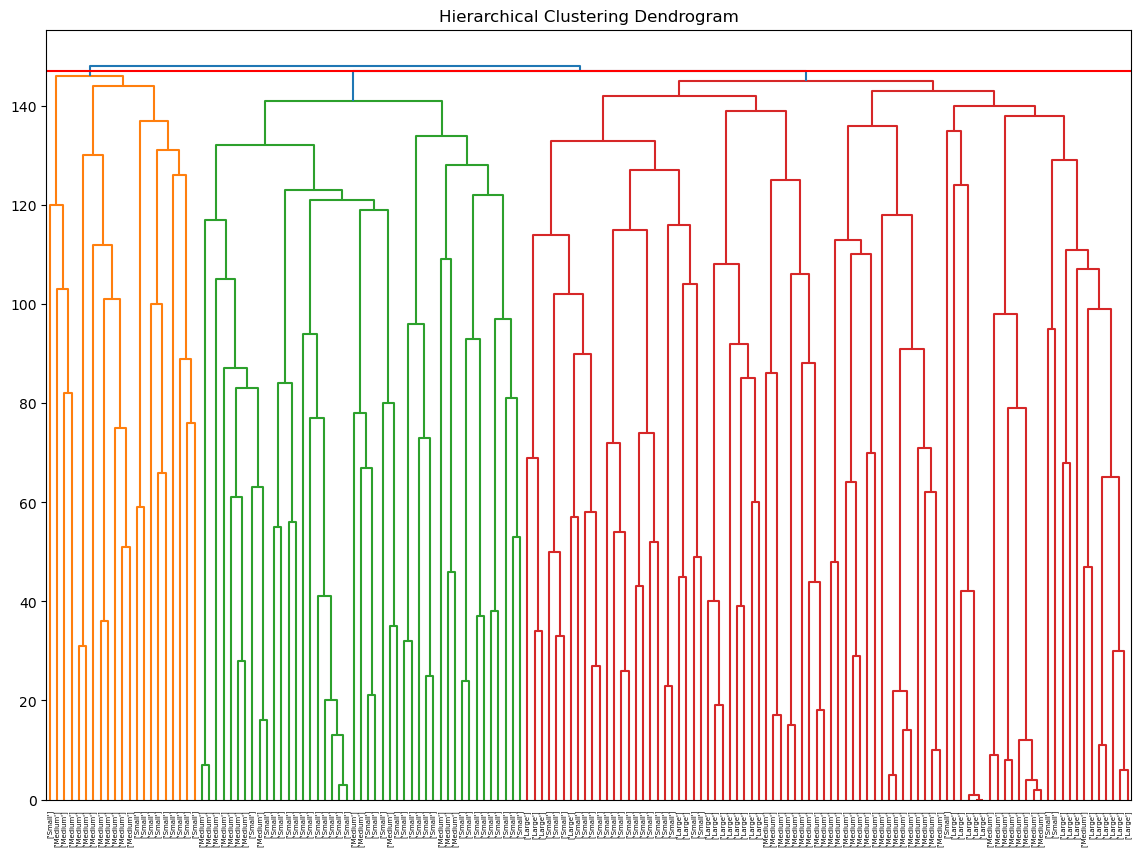

In [277]:
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram')

plot_dendrogram(pipe_pop_clustering,labels=Y_pop.values, color_threshold=147)

plt.xticks(rotation=90)
plt.savefig('Clustering.pdf')
plt.show()

In [278]:
pop_size_clustering = pd.concat([pd.DataFrame(Y_pred_pop), Y_pop, X], axis=1)
pop_size_clustering = pop_size_clustering.rename(columns={0:'Y_pred_pop'})
# display(pop_size_clustering)

In [279]:
pop_crosstab = pd.crosstab(
    pop_size_clustering['pop_size'],
    pop_size_clustering['Y_pred_pop'],
    margins=True)
display(pop_crosstab)

Y_pred_pop,0,1,2,All
pop_size,,,,
Large,0,28,0,28
Medium,11,34,14,59
Small,10,22,31,63
All,21,84,45,150


### Region Clustering

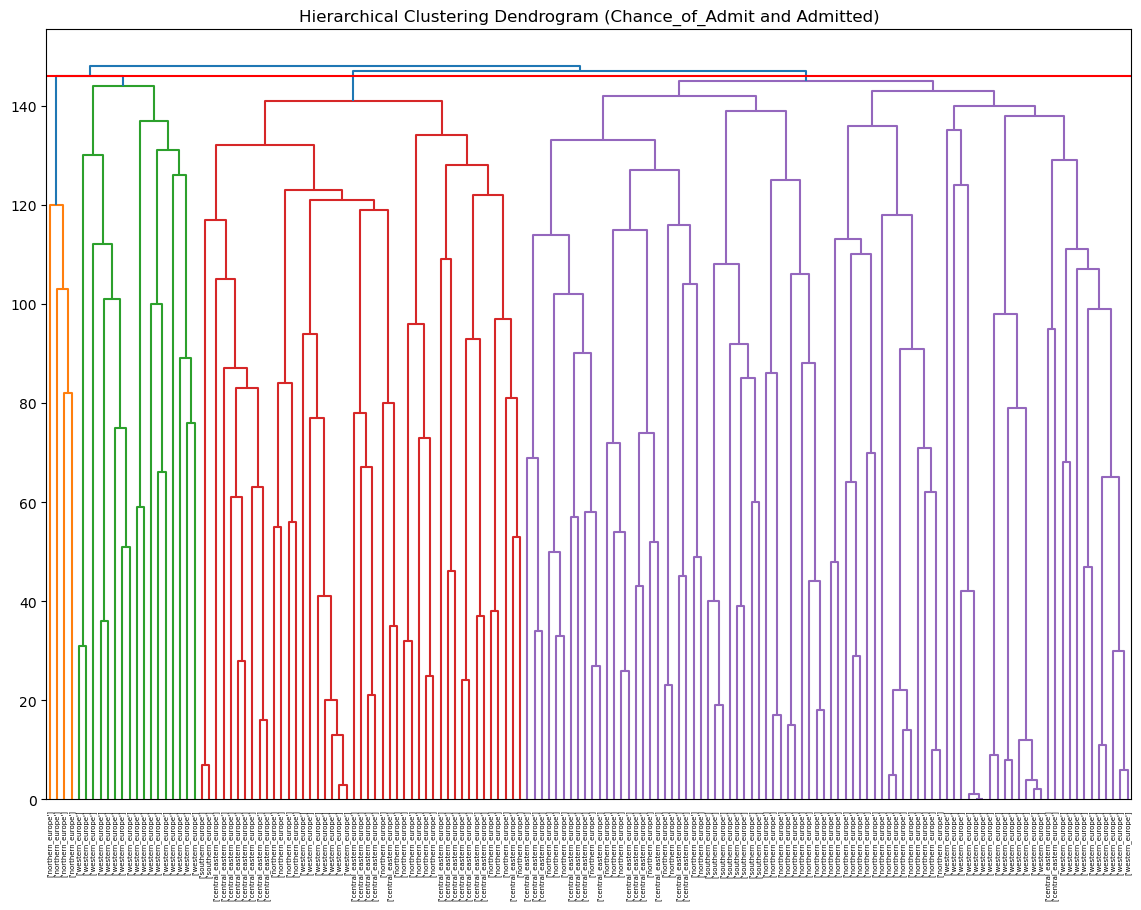

In [280]:
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (Chance_of_Admit and Admitted)')

plot_dendrogram(pipe_region_clustering,labels=Y_region.values, color_threshold=146)

plt.xticks(rotation=90)
plt.savefig('Region_Clustering.pdf')
plt.show()

In [281]:
region_clustering = pd.concat([pd.DataFrame(Y_pred_region), Y_region, X], axis=1)
region_clustering = region_clustering.rename(columns={0:'Y_pred_region'})
# display(region_clustering)

In [282]:
reg_crosstab = pd.crosstab(
    region_clustering['region'],
    region_clustering['Y_pred_region'],
    margins=True)
display(reg_crosstab)

Y_pred_region,0,1,2,3,All
region,,,,,
central_eastern_europe,15,0,21,0,36
northern_europe,37,0,15,4,56
southern_europe,8,0,2,0,10
western_europe,24,17,7,0,48
All,84,17,45,4,150


### Country Clustering

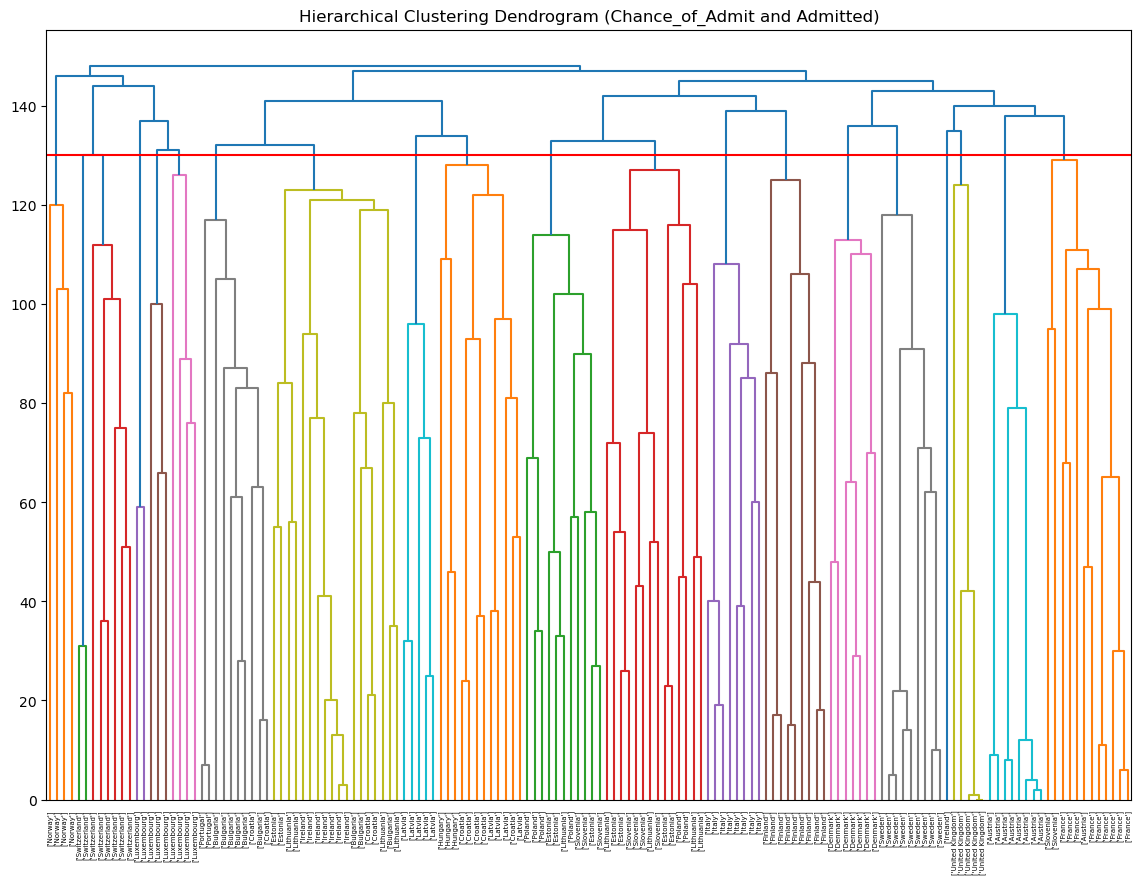

In [283]:
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (Chance_of_Admit and Admitted)')

plot_dendrogram(pipe_country_clustering,labels=Y_country.values, color_threshold=130)

plt.xticks(rotation=90)
plt.savefig('Country_Clustering.pdf')
plt.show()

In [284]:
country_clustering = pd.concat([pd.DataFrame(Y_pred_country), Y_country, X], axis=1)
country_clustering = country_clustering.rename(columns={0:'Y_pred_country'})
display(country_clustering)

,Y_pred_country,country,passenger_cars_per_1000,passengers_transported_per_1000,inland_investment_per_1000,road_spending_per_1000,non_road_spending_per_1000
0,11,Austria,542,30.984093,240006.060807,100379.145352,139626.915455
1,11,Austria,546,32.169014,239237.280315,109088.413675,130148.866640
2,11,Austria,547,31.842950,238604.967262,131644.119869,106960.847393
3,11,Austria,546,32.622296,233665.380459,133606.276862,100059.103596
4,11,Austria,550,32.985571,226309.587148,131142.325513,95167.261634
...,...,...,...,...,...,...,...
145,3,United Kingdom,449,24.305203,225582.304335,141870.624417,83711.679918
146,3,United Kingdom,463,26.853830,365956.881470,188613.167194,177343.714276
147,3,United Kingdom,469,27.112097,337608.193170,169278.732785,168329.460385
148,3,United Kingdom,471,26.689679,337860.575509,168598.015067,169262.560442


In [285]:
country_crosstab = pd.crosstab(
    country_clustering['country'],
    country_clustering['Y_pred_country'],
    margins=True)
display(country_crosstab)

Y_pred_country,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,All
country,,,,,,,,,,,,,,,,,,,,,
Austria,1,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,9
Bulgaria,0,0,0,0,0,3,0,0,6,0,...,0,0,0,0,0,0,0,0,0,9
Croatia,0,5,0,0,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,9
Denmark,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,0,0,0,7
Estonia,0,0,0,0,4,2,0,0,0,0,...,0,0,0,0,0,3,0,0,0,9
Finland,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,9
France,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
Hungary,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Ireland,0,0,0,0,0,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,8


## A More Simple Linear Regression

In [313]:
# OLS Regression on passengers_transported as a function of non_road_spending
# F-statistic is really big, which means there is a difference
model3 = smf.ols('passengers_transported_per_1000 ~ non_road_spending_per_1000*passenger_cars_per_1000', data=transportation_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     passengers_transported_per_1000   R-squared:                       0.311
Model:                                         OLS   Adj. R-squared:                  0.297
Method:                              Least Squares   F-statistic:                     21.95
Date:                             Thu, 06 Apr 2023   Prob (F-statistic):           8.66e-12
Time:                                     18:40:29   Log-Likelihood:                -607.00
No. Observations:                              150   AIC:                             1222.
Df Residuals:                                  146   BIC:                             1234.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              5.8101      6.678      0.870      0.386      -7.388      19.008
non_road_spending_per_1000                             0.0002   6.53e-05      2.650      0.009     4.4e-05       0.000
passenger_cars_per_1000                                0.0180      0.013      1.339      0.182      -0.009       0.045
non_road_spending_per_1000:passenger_cars_per_1000 -1.602e-07    1.1e-07     -1.459      0.147   -3.77e-07    5.69e-08
==============================================================================
Omnibus:                       61.156   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.031
Skew:                           1.673   Prob(JB):                     8.85e-37
Kurtosis:                       6.921   Cond. No.                     3.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
# non_road_spending_per_1000*passenger_cars_per_1000
y_pred = model3.predict(transportation_data[['non_road_spending_per_1000', 'passenger_cars_per_1000']])

In [315]:
y_pred

9      27.613091
10     26.784989
11     24.802434
12     24.211186
13     23.803868
         ...    
352    22.365229
353    31.683946
354    30.739373
355    30.812517
356    30.785852
Length: 150, dtype: float64

eval_env: 1


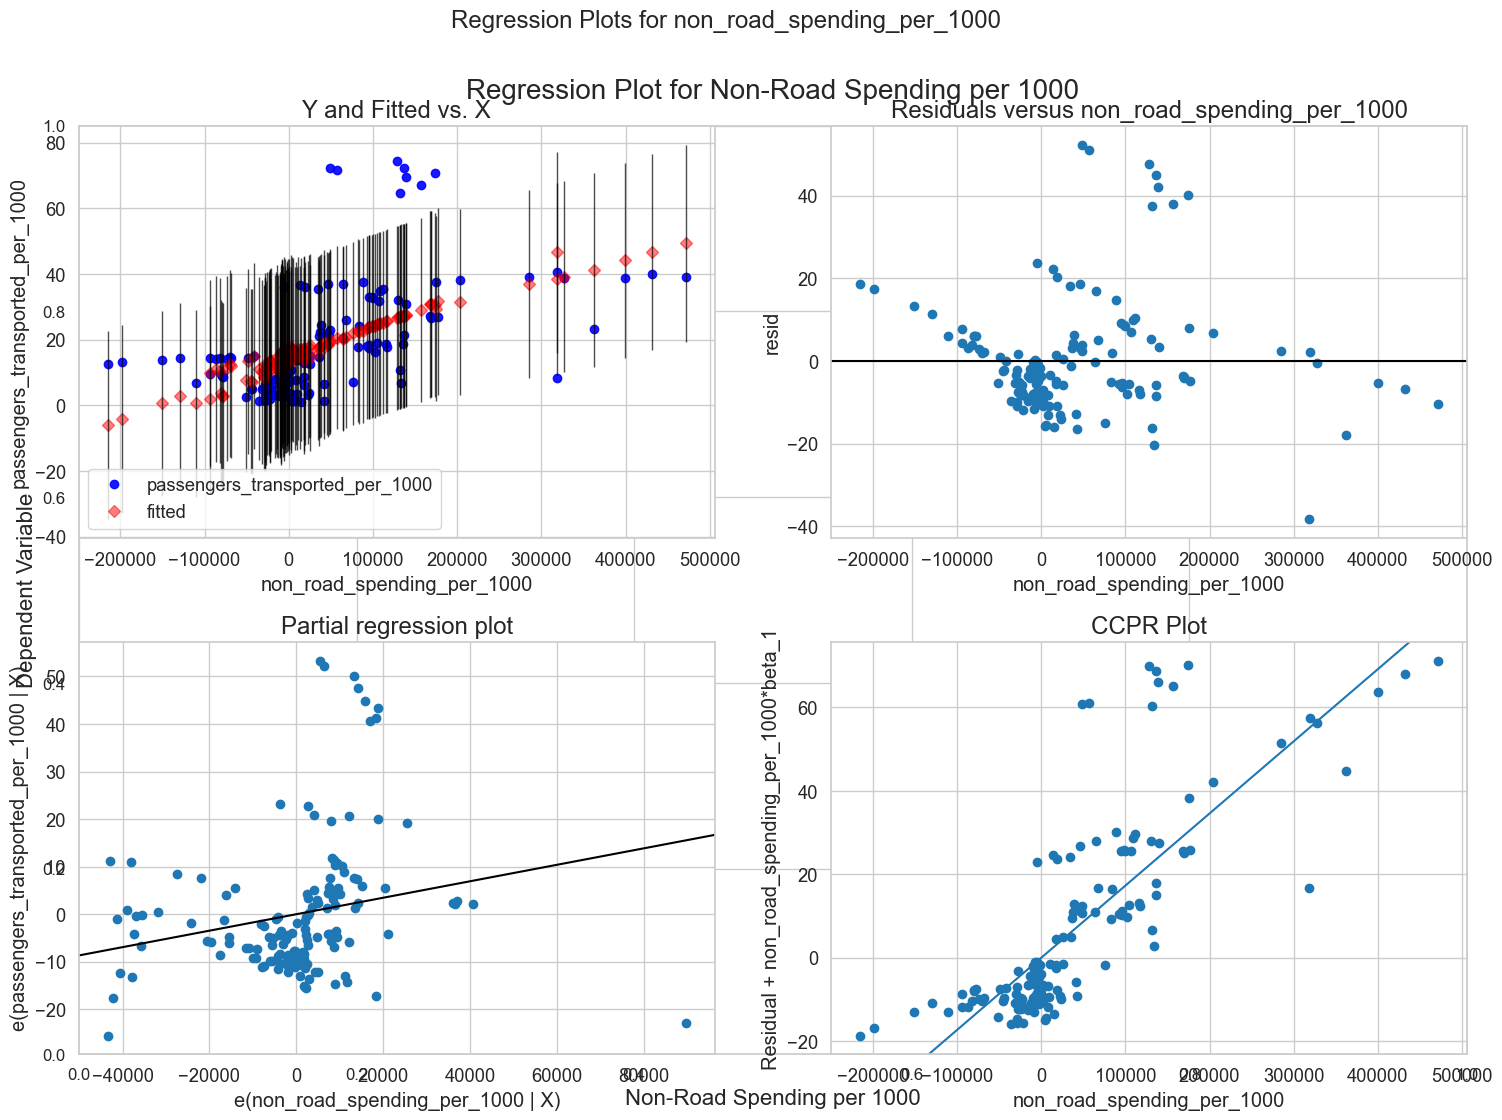

In [316]:
# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the regression plot with a larger figsize
fig, ax = plt.subplots(figsize=(16, 12))
sm.graphics.plot_regress_exog(model3, 'non_road_spending_per_1000', fig=fig)

# Customize the plot
ax.set_title("Regression Plot for Non-Road Spending per 1000", fontsize=20, pad=20)
ax.set_xlabel("Non-Road Spending per 1000", fontsize=16)
ax.set_ylabel("Dependent Variable", fontsize=16)

# Set the tick labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Tighten layout
fig.tight_layout()

# Show the plot
plt.show()

In [317]:
# Get y_actual
y_actual = transportation_data['passengers_transported_per_1000']

# Calculate the residuals
residuals = y_actual - y_pred

# Calculate the mean of squared residuals
mse = np.mean(residuals**2)

# Calculate the RMSE
rmse = np.sqrt(np.mean(residuals**2))

print("RMSE:", rmse)

RMSE: 13.842573228806666


In [318]:
# indicates performance of OLS model - lower is better
squared_rmse = rmse**2
squared_rmse

191.616833594875

In [323]:
# OLS Regression on passengers_transported as a function of non_road_spending
# F-statistic is really big, which means there is a difference
model4 = smf.ols('passengers_transported_per_1000~non_road_spending_per_1000*passenger_cars_per_1000*inland_investment_per_1000*road_spending_per_1000', data=transportation_data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     passengers_transported_per_1000   R-squared:                       0.803
Model:                                         OLS   Adj. R-squared:                  0.790
Method:                              Least Squares   F-statistic:                     63.25
Date:                             Thu, 06 Apr 2023   Prob (F-statistic):           6.09e-45
Time:                                     18:47:41   Log-Likelihood:                -513.23
No. Observations:                              150   AIC:                             1046.
Df Residuals:                                  140   BIC:                             1077.
Df Model:                                        9                                         
Covariance Type:                         nonrobust                                         
========================================================================================================================================================================
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                              7.67e-16   6.32e-17     12.142      0.000    6.42e-16    8.92e-16
non_road_spending_per_1000                                                                            3.498e-10   9.89e-11      3.539      0.001    1.54e-10    5.45e-10
passenger_cars_per_1000                                                                               6.169e-13   8.21e-14      7.515      0.000    4.55e-13    7.79e-13
non_road_spending_per_1000:passenger_cars_per_1000                                                    1.738e-07   4.92e-08      3.536      0.001    7.67e-08    2.71e-07
inland_investment_per_1000                                                                            2.272e-10   3.25e-11      6.991      0.000    1.63e-10    2.91e-10
non_road_spending_per_1000:inland_investment_per_1000                                                -4.971e-10    3.8e-10     -1.307      0.193   -1.25e-09    2.55e-10
passenger_cars_per_1000:inland_investment_per_1000                                                    1.496e-07   2.58e-08      5.798      0.000    9.86e-08    2.01e-07
non_road_spending_per_1000:passenger_cars_per_1000:inland_investment_per_1000                         3.921e-13   8.08e-13      0.485      0.628   -1.21e-12    1.99e-12
road_spending_per_1000                                                                               -1.004e-10   6.25e-11     -1.605      0.111   -2.24e-10    2.32e-11
non_road_spending_per_1000:road_spending_per_1000                                                     1.656e-10   4.86e-10      0.341      0.734   -7.95e-10    1.13e-09
passenger_cars_per_1000:road_spending_per_1000                                                       -2.427e-08   2.44e-08     -0.993      0.322   -7.26e-08     2.4e-08
non_road_spending_per_1000:passenger_cars_per_1000:road_spending_per_1000                            -6.807e-13   9.28e-13     -0.734      0.464   -2.51e-12    1.15e-12
inland_investment_per_1000:road_spending_per_1000                                                     2.442e-10   5.87e-11      4.159      0.000    1.28e-10     3.6e-10
non_road_spending_per_1000:inland_investment_per_1000:road_spending_per_1000                          1.119e-15   1.06e-15      1.051      0.295   -9.87e-16    3.22e-15
passenger_cars_per_1000:inland_investment_per_1000:road_spending_pe

In [324]:
# non_road_spending_per_1000*passenger_cars_per_1000*inland_investment_per_1000*road_spending_per_1000
y_pred = model4.predict(transportation_data[['non_road_spending_per_1000', 'passenger_cars_per_1000', 'inland_investment_per_1000', 'road_spending_per_1000']])

In [325]:
# Get y_actual
y_actual = transportation_data['passengers_transported_per_1000']

# Calculate the residuals
residuals = y_actual - y_pred

# Calculate the mean of squared residuals
mse = np.mean(residuals**2)

# Calculate the RMSE
rmse = np.sqrt(np.mean(residuals**2))

print("RMSE:", rmse)

RMSE: 7.408263453830051


In [326]:
# indicates performance of OLS model - lower is better, and we got lower
squared_rmse = rmse**2
squared_rmse

54.88236740135395